# Gradient Descent

BUSMGT 7247

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Define a Cost Function

In [13]:
# def f(x):
#     return x**2
    
# A more complex example
#
# It helps to reduce the learning rate to 0.0001 for this example
#
def f(x):
     return (x**6 / 30 - x**5 / 20
             - x**4 + 3*x + 20)

## Algorithm Settings

In [14]:
def numerical_derivative(f, x, h):
    return (f(x + h) - f(x)) / h

In [20]:
start_interval = [-10, 10]

# Learning rate
lr = 0.001

# Amount to perturb the current point when taking a derivative numerically
h = 0.00001

# Tolerance: stop if the derivative is less than this value
tolerance = 0.00001

# Max iterations
max_iter = 1000

## Run Algorithm

In [21]:
# Record visited points
xs = np.zeros(max_iter)
ys = np.zeros(max_iter)
derivs = np.zeros(max_iter)

# Randomly select starting point
xcurr = np.random.uniform(*start_interval)
ycurr = f(xcurr)
dcurr = numerical_derivative(f, xcurr, h)

# Iteration counter
iters = np.arange(max_iter)
stop_i = max_iter

for i in iters:    
    # Record current point
    xs[i] = xcurr
    ys[i] = ycurr
    derivs[i] = dcurr
    
    # Stop if the derivative is below the tolerance
    if np.abs(dcurr) < tolerance:
        stop_i = i
        break
    
    dcurr = numerical_derivative(f, xcurr, h)
    xcurr = xcurr - lr*dcurr
    ycurr = f(xcurr)
    
# Drop iterations not completed due to the tolerance condition
iters = iters[:stop_i]
xs = xs[:stop_i]
ys = ys[:stop_i]
derivs = derivs[:stop_i]

In [22]:
# Show final value of x and the stopping iteration
print(f'x:               {xcurr:.4f}\n'
      f'Final iteration: {stop_i}')

x:               5.1283
Final iteration: 77


## Plot Results

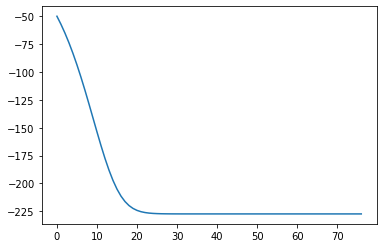

In [23]:
# Plot the evolution of ycurr over the iterations
plt.plot(iters, ys)
plt.show()

In [24]:
# Plot the function and the points that the algorithm visits
plot_max = 2 * max(np.abs(xs))
plot_min = -1 * plot_max
plot_step = 0.01
plot_range = np.arange(plot_min, plot_max, plot_step)

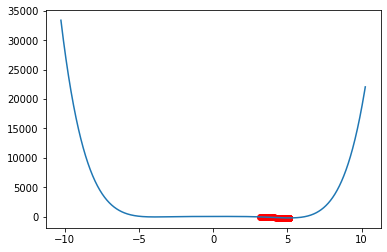

In [25]:
plt.plot(plot_range, [f(x) for x in plot_range])
plt.scatter(xs, ys, color='red')
plt.show()

# Exercise
Try different cost functions and algorithm settings.